# I- Préparation des données 

### 1 - Informations sur les données 

8) Code pour lire le fichier housing

In [ ]:
import os 
import pandas as pd
print(os.getcwd()); 
d = pd.read_csv('/content/drive/MyDrive/Cours/ISEN/M1/IA/TP1-Regression/housing.csv');
data = pd.DataFrame(data=d); #création nouvelle dataframe
data.head()

/content


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


9) Code qui affiche les infos sur les donnes. Le nombre de lignes et colones 

La valeur cible etant median_house_value nous traitons ici un problème de régression. 


In [ ]:
data.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*   20640 lignes 
*   10 colones 
* L'attribut 4 total_bedroooms change par rapport aux autre en nombre non-null. Le nombre d'instance change; 






10) affiche l'occurrence des valeurs utilisées dans "ocean_proximity"

In [ ]:
data["ocean_proximity"].value_counts(ascending=True)

ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
INLAND        6551
<1H OCEAN     9136
Name: ocean_proximity, dtype: int64

11) Statistiques sur les features 

In [ ]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


12) Affiche les histogrammes des différents features. 

<Figure size 432x288 with 0 Axes>

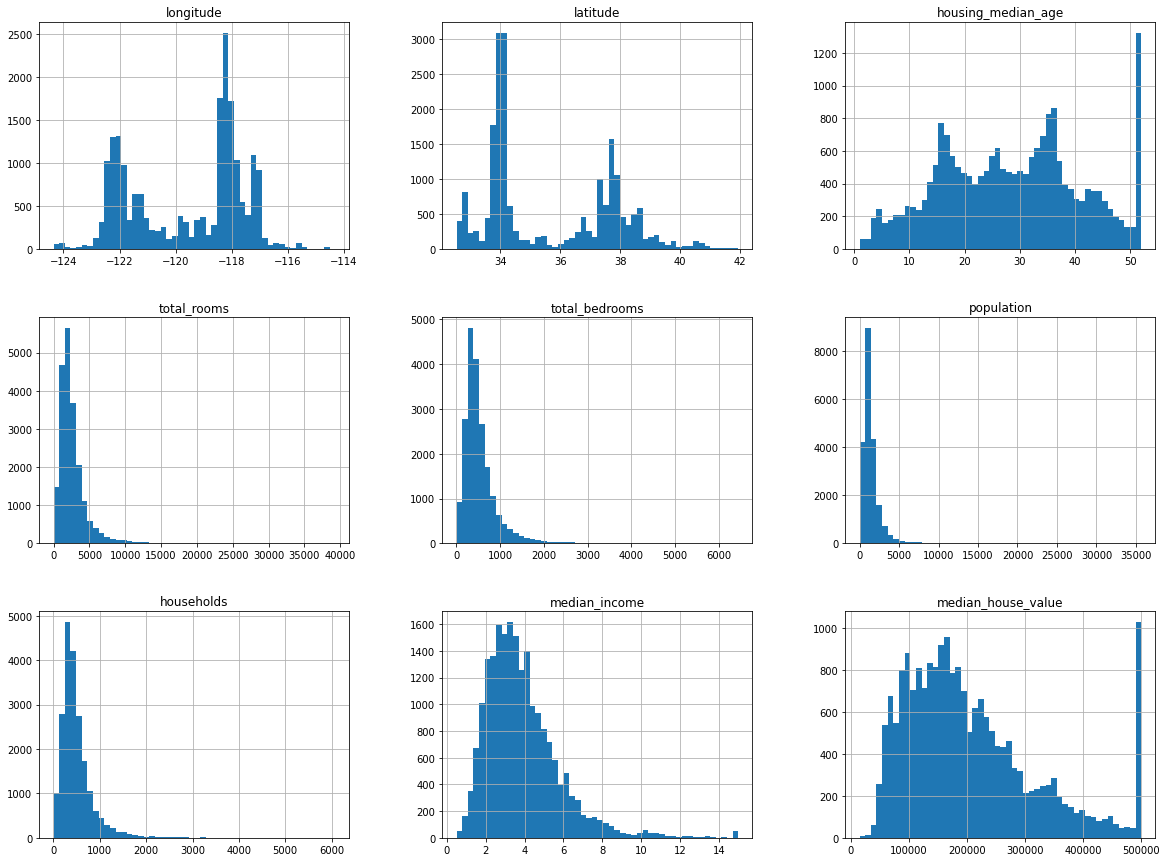

In [ ]:
import matplotlib.pyplot as plt

plt.figure();
figsize=(20,15);
data.hist( bins=50,figsize=(20,15));


## **2-Répartition des données**

14) Partitionner les données en base d'apprentissage et base de test. 

In [ ]:
from sklearn.model_selection import train_test_split

data_Train, data_Test = train_test_split(data, test_size=0.2, train_size=0.8); 

#data_Train.head() 
data_Test.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11402,-117.92,33.73,17.0,1692.0,293.0,934.0,280.0,4.4728,205800.0,0.0
7122,-118.03,33.91,32.0,4040.0,832.0,2526.0,798.0,3.2143,160100.0,0.0
7375,-118.22,33.97,47.0,1058.0,295.0,1097.0,274.0,2.8810,183300.0,0.0
17681,-121.87,37.29,18.0,1892.0,568.0,974.0,553.0,2.3715,228000.0,0.0
12914,-121.32,38.61,22.0,3902.0,845.0,1870.0,763.0,2.7740,190200.0,1.0


## **3- Découvete et visualisation des données**

19) le lien entre la position géographique et le prix des maisons

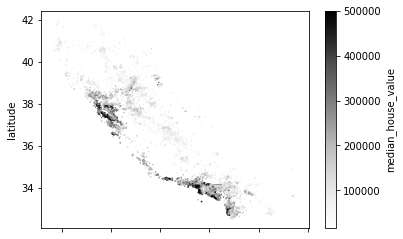

In [ ]:
map= data_Train.plot(kind='scatter', x='longitude', y='latitude',c='median_house_value',s=0.1, stacked=False);

19) Afficher l'image de la californie en arrière plan 

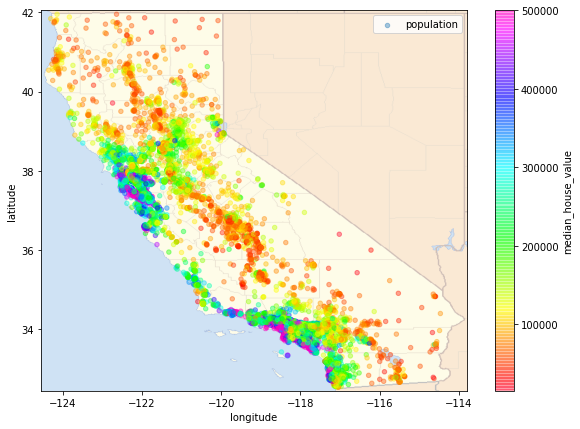

In [ ]:
import matplotlib.image as mpimg
california_img= plt.imread('/content/drive/MyDrive/Cours/ISEN/M1/IA/TP1-Regression/california.png') ;
#img=plt.imshow(california_img);
data_Train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, label="population", c="median_house_value", colormap='gist_rainbow', colorbar=True, sharex=False,figsize=(10,7))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))
plt.legend()

20 ) Etude de la corrélation de l'attribut "median_house_value" avec les autres attributs. 

La correlation mesure la relation linéaire entre deux variables. 

In [ ]:
#corrélation attribut median_hose_value avec longitude : 
print("longitude corr : ", data_Train["median_house_value"].corr(data_Train["longitude"], method="pearson") ) 

#corrélation attribut median_hose_value avec latitude :
print("latitude corr : ",data_Train["median_house_value"].corr(data_Train["latitude"], method="pearson") ) 

#corrélation attribut median_hose_value avec housing_median_age :
print("housing_median_age corr : ", data_Train["median_house_value"].corr(data_Train["housing_median_age"], method="pearson") ) 

#corrélation attribut median_hose_value avec total_rooms :
print("total_rooms corr : ", data_Train["median_house_value"].corr(data_Train["total_rooms"], method="pearson") ) 

#corrélation attribut median_hose_value avec total_bedrooms :
print("total_bedrooms corr : ", data_Train["median_house_value"].corr(data_Train["total_bedrooms"], method="pearson") ) 

#corrélation attribut median_hose_value avec population :
print("population corr : ", data_Train["median_house_value"].corr(data_Train["population"], method="pearson") ) 

#corrélation attribut median_hose_value avec households :
print("households corr : ", data_Train["median_house_value"].corr(data_Train["households"], method="pearson") ) 

#corrélation attribut median_hose_value avec median_income :
print("median_income corr : ", data_Train["median_house_value"].corr(data_Train["median_income"], method="pearson") ) 

#corrélation attribut median_hose_value avec ocean_proximity :
print("ocean_proximity corr : ", data_Train["median_house_value"].corr(data_Train["ocean_proximity"], method="pearson") ) 

longitude corr :  -0.04194684655632459
latitude corr :  -0.1475675845643724
housing_median_age corr :  0.10643413001607052
total_rooms corr :  0.1340370679320806
total_bedrooms corr :  0.05339384827052167
population corr :  -0.022058090586265806
households corr :  0.06989693126386508
median_income corr :  0.6808288823279696
ocean_proximity corr :  0.07778050108759962


On remarque une corrélation pour toutes les variables sauf pour ocean_proximity qui retourne une erreur à cause du type de donnée. Il faudra modifier ce type de donnée pour trouver une corrélation.

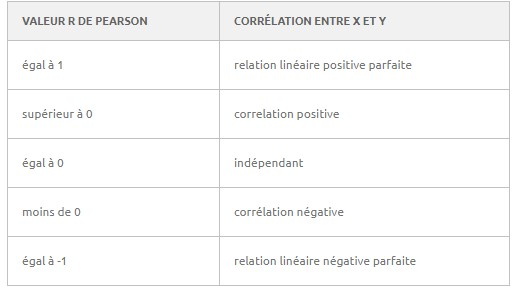

## **4- Nettoyage des données**

22) Séparer les labels et les inputs features 


Penser à passer les données ocean_proximity en numérique puis séparr à nouveau les données train et test. Puis séparer les labels et les features 

In [ ]:
#inputs , features ,X

features_data_train = data_Train.drop(columns='median_house_value');
features_data_test = data_Test.drop(columns='median_house_value');

#Labels, valeur à prédire ,y 
labels_tests=data_Test["median_house_value"];
labels_train =data_Train["median_house_value"]; 

#vérification par print 
print(features_data_train)
#print(labels_train)

       longitude  latitude  ...  median_income  ocean_proximity
17981    -121.95     37.31  ...         3.5652              0.0
18763    -122.32     40.71  ...         2.4036              1.0
14067    -117.12     32.75  ...         1.6400              4.0
7362     -118.19     33.97  ...         1.9485              0.0
18601    -122.12     37.16  ...         5.1664              4.0
...          ...       ...  ...            ...              ...
7717     -118.13     33.94  ...         3.5481              0.0
8148     -118.08     33.81  ...         7.6084              0.0
8227     -118.20     33.78  ...         2.3305              4.0
19868    -119.34     36.33  ...         4.1812              1.0
12225    -116.90     33.65  ...         2.1071              1.0

[16512 rows x 9 columns]


23) Remplacer les valeurs manquantes de total_bedrooms par la médian. 


In [ ]:
#Remplacer les valeurs manquantes par une autre valeur  dans total_bedrooms
median=data['total_bedrooms'].median();
data["total_bedrooms"].fillna(median, inplace=True); 
data.info(verbose=True);
data_Train.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7674 to 3968
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  f

25) Transformer les valeurs textuelles ocean_proximity par des valeurs numériques 

In [ ]:
data["ocean_proximity"].head(10) #afficher 10 des valeurs 
#Passer en valeurs numériques 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
ocean_proximity=data["ocean_proximity"];
ocean_proximity=ocean_proximity.values.reshape(-1,1); 
ocean_proximity2=enc.fit_transform(ocean_proximity);#appliquer la tranformée 
data["ocean_proximity"]= ocean_proximity2
print(data["ocean_proximity"])

#data["ocean_proximity"] = enc.fit_transform(ocean_proximity);


0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
20635    1.0
20636    1.0
20637    1.0
20638    1.0
20639    1.0
Name: ocean_proximity, Length: 20640, dtype: float64


#**II- Sélection et apprentissage du modèle**

##**1- Apprentissage des données**


28) Appliquer la régression linéaire sur les données d'apprentissage.
(Apprentissage du model de régression linéaire sur les données d'apprentissage ) 

In [ ]:
from sklearn.linear_model import LinearRegression
#Appliquez la méthode fit sur cet objet en donnant comme arguments les données d'apprentissages et leurs labels (valeurs cibles)
reg = LinearRegression().fit(features_data_train,labels_train)
#print(features_data_train)

##**2- Evaluation du modèle d'apprentissage sur les données   d'apprentissage**

30) Prédiction sur la base d'apprentissage. Sauvegarde des prédictions dans label_predicted_reg_data_train

In [ ]:
 #Labels prédict avec les données d'entrainememt
label_predicted_reg_data_train=reg.predict(features_data_train);
print("lebels predicted with linear regression on data train \n",label_predicted_reg_data_train)
#Labels des données d'entrainememt 
print("true labels training \n",labels_train);

lebels predicted with linear regression on data train 
 [239357.38220399  48592.31617591 167173.3350585  ... 174288.84198986
 166663.7245446   90110.75170772]
true labels training 
 17981    329500.0
18763    105400.0
14067    130000.0
7362     146300.0
18601    185100.0
           ...   
7717     265000.0
8148     402500.0
8227     162500.0
19868     93700.0
12225     93800.0
Name: median_house_value, Length: 16512, dtype: float64


31) Calcul de la mesure RMSE sur le modèle de régression linéaire

In [ ]:
#RMSE 
from sklearn.metrics import mean_squared_error
import math
print('RMSE :',math.sqrt(mean_squared_error(labels_train,label_predicted_reg_data_train)))

RMSE : 69763.25425199192


La valeur de RMSE est très forte. Cela reflète la faible capacité du modèle à prédire avec précision les données 

32) Calcul de RMSE avec DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score

TreeReg = DecisionTreeRegressor(random_state=0).fit(features_data_train,labels_train);
labels_predict_decisionTree =TreeReg.predict(features_data_train); 
print("labels prediced with DecisionTreeRegressor ", labels_predict_decisionTree);

print("true labels\n",labels_train);
print('RMSE with DecisionTreeRegressor :',(mean_squared_error(labels_train,labels_predict_decisionTree)))




labels prediced with DecisionTreeRegressor  [329500. 105400. 130000. ... 162500.  93700.  93800.]
true labels
 17981    329500.0
18763    105400.0
14067    130000.0
7362     146300.0
18601    185100.0
           ...   
7717     265000.0
8148     402500.0
8227     162500.0
19868     93700.0
12225     93800.0
Name: median_house_value, Length: 16512, dtype: float64
RMSE with DecisionTreeRegressor : 0.0


33) Répartir la base d'apprentissage en base d'apprentissage et validation en utilisant 10-fold cross-validation. 

In [ ]:
from sklearn.model_selection import cross_val_score

#cv = 10 car 10-fold cross-validation.
scores =cross_val_score(TreeReg,features_data_train,labels_train,scoring="neg_mean_squared_error",cv=10)

#valeurs des 10  RMSE 
print("10 RMSE TreeReg",scores,"\n")

#écart type et moyenne 
print("Accuracy TreeReg : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



10 RMSE TreeReg [-4.66774584e+09 -4.94137417e+09 -4.77578728e+09 -4.61057829e+09
 -4.99228562e+09 -4.58805356e+09 -4.40255104e+09 -5.03503662e+09
 -5.00825013e+09 -4.04900507e+09] 

Accuracy TreeReg : -4707066764.28 (+/- 596671848.64)


34) Appliquer la méthode 10 fold cross validation sur la regression linéaire 

In [ ]:
from sklearn.model_selection import cross_val_score

#cv = 10 car 10-fold cross-validation.
scores_reg =cross_val_score(reg,features_data_train,labels_train,scoring="neg_mean_squared_error",cv=10)

#valeurs des 10  RMSE 
print("10 RMSE Linéare Reg",scores_reg,"\n")

#écart type et moyenne 
print("Accuracy Linéare Reg : %0.2f (+/- %0.2f)" % (scores_reg.mean(), scores_reg.std() * 2))

10 RMSE Linéare Reg [-4.70776793e+09 -4.87398186e+09 -4.89852874e+09 -4.71039890e+09
 -5.01743357e+09 -5.04330949e+09 -5.01056279e+09 -4.80642235e+09
 -5.06119937e+09 -4.69769810e+09] 

Accuracy Linéare Reg : -4882730310.60 (+/- 277718486.46)


Quand on compare les résultats on retrouve les mêmes ordres de grandeur. Le modèle de décision Tree doit présenter un problème d'apprentissage car il indique un résultat RMSE de 0 sans les 10 fold cross value. Or après avoir séparé en données d'apprentisage et de validation on voit que celui-ci apprend comme la Regression Linéaire. 

# III- Fine-tuning

## 1 Grid Search

36) Crée un objet de la classe RandomForestRegresso

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

regrForest = RandomForestRegressor(max_depth=2, random_state=0)

param_grid =[ {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},]

clfSearchCV = GridSearchCV(regrForest,param_grid,scoring="neg_mean_squared_error",cv=5)

clfSearchCV.fit(features_data_train, labels_train )



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=2,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=Non

37) Affichez les meilleurs paramètres de la méthode RandomForestRegressor

In [ ]:
clfSearchCV.best_params_

{'max_features': 6, 'n_estimators': 30}

38) Afficher le résultat des 12 combinaisons 

In [ ]:
pd.DataFrame(clfSearchCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019191,0.001456,0.002128,0.000047,2,3,"{'max_features': 2, 'n_estimators': 3}",-8.026395e+09,-7.947077e+09,-8.041416e+09,-7.898999e+09,-7.627346e+09,-7.908247e+09,1.497943e+08,10
1,0.056899,0.001799,0.003308,0.000180,2,10,"{'max_features': 2, 'n_estimators': 10}",-8.478849e+09,-8.226143e+09,-8.421362e+09,-8.381382e+09,-8.303839e+09,-8.362315e+09,8.876094e+07,11
2,0.150051,0.003844,0.005838,0.000596,2,30,"{'max_features': 2, 'n_estimators': 30}",-8.825105e+09,-8.623497e+09,-8.795091e+09,-8.779981e+09,-8.627915e+09,-8.730318e+09,8.665273e+07,12
3,0.029199,0.001269,0.002225,0.000216,4,3,"{'max_features': 4, 'n_estimators': 3}",-7.186532e+09,-7.123415e+09,-7.303896e+09,-7.541647e+09,-7.112432e+09,-7.253584e+09,1.592954e+08,7
4,0.081566,0.001015,0.003075,0.000286,4,10,"{'max_features': 4, 'n_estimators': 10}",-7.402852e+09,-7.265236e+09,-7.378259e+09,-7.670401e+09,-7.400542e+09,-7.423458e+09,1.334224e+08,8
5,0.228875,0.005980,0.005811,0.000838,4,30,"{'max_features': 4, 'n_estimators': 30}",-7.710828e+09,-7.449021e+09,-7.809687e+09,-8.021854e+09,-7.800838e+09,-7.758446e+09,1.853742e+08,9
6,0.036162,0.000966,0.002440,0.000343,6,3,"{'max_features': 6, 'n_estimators': 3}",-7.072423e+09,-7.120179e+09,-7.290389e+09,-7.551820e+09,-7.079709e+09,-7.222904e+09,1.824508e+08,6
7,0.108566,0.002118,0.003401,0.000666,6,10,"{'max_features': 6, 'n_estimators': 10}",-6.922469e+09,-6.895850e+09,-6.982011e+09,-7.318215e+09,-6.773933e+09,-6.978496e+09,1.828861e+08,2
8,0.319207,0.007595,0.006126,0.001162,6,30,"{'max_features': 6, 'n_estimators': 30}",-6.868949e+09,-6.864161e+09,-6.947507e+09,-7.285476e+09,-6.889197e+09,-6.971058e+09,1.599798e+08,1
9,0.041660,0.000535,0.002188,0.000090,8,3,"{'max_features': 8, 'n_estimators': 3}",-7.024288e+09,-7.034882e+09,-7.266319e+09,-7.447060e+09,-7.087449e+09,-7.171999e+09,1.626795e+08,5


## 2- Evaluation du modèle d'apprentissage sur les données de test


39) & 40) Les valeurs Nan sont déjà remplacés en réalisant la technique mentionnée à la Q22. 

In [ ]:
fitTest= clfSearchCV.fit(features_data_test, labels_tests )
predictionTest=fitTest.predict(features_data_test)
print(predictionTest)

[214358.33525642 144648.46503039 199513.68825323 ... 238553.13799588
 308182.44874355 205341.82392216]


40) calcul RMSE


In [ ]:
print('RMSE with clfSearchCV :',(mean_squared_error(labels_tests,predictionTest)))

RMSE with clfSearchCV : 6593438018.4836235
